In [1]:
# !python
# -*- coding: utf-8 -*

__author__ = 'Erling Ween Eriksen'
__email__ = 'erlinge@nmbu.no'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize

In [2]:

N_spins = [40*40,60*60,80*80,100*100]
kb = 1.380649 * 10 ** (-23)

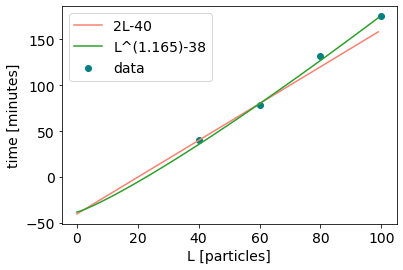

In [168]:
coords = [40,60,80, 100]
points = [40,79,132, 175]
rise = (135-79)/(20)
intercept = -40
rangei = range(100)

plt.plot(rangei, [2*i+intercept for i in rangei], color = 'salmon', label='2L-40')
plt.plot(rangei, [i**1.165 -38  for i in rangei], color = 'tab:green', label='L^(1.165)-38')
plt.scatter(coords,points, color = 'teal', label='data')
#plt.plot(np.arange(1,100), [0.3*i*np.log(i) for i in np.arange(1,100)], color = 'tab:blue', label='0.3Nlog(N)')
#plt.plot(np.arange(1,100), [i for i in np.arange(1,100)], color = 'tab:green', label='N')
#plt.plot(np.arange(1,90), [i*(1 +i)**i for i in np.arange(1,90)], color = 'tab:green', label='N')
plt.ylabel('time [minutes]')

plt.xlabel('L [particles]')
plt.legend()
plt.show()


In [4]:
#very weird behavior
#plt.plot(np.arange(1,90), [i*(1 +i)**i for i in np.arange(1,90)], color = 'tab:green', label='N')

In [5]:
#real    39m46.468s
N40 = 40*40

path40_4 = 'TME_N40_20T_4'
TME40_4 = pd.read_csv(path40_4, names=['T','M', 'E', 'M2','E2'])

TME40_4['C'] = 1/(N40*kb*(TME40_4['T']/kb)**2) * (TME40_4['E2'] - TME40_4['E']**2)
TME40_4['X'] = 1/(N40*(TME40_4['T'])) * (TME40_4['M2'] - TME40_4['M']**2)


In [19]:
#real    78m59.210s
N60 = 60*60

path60_4 = 'TME_N60_20T_4'
TME60_4 = pd.read_csv(path60_4, names=['T','M', 'E', 'M2','E2'])

TME60_4['C'] = 1/(N60*kb*(TME60_4['T']/kb)**2) * (TME60_4['E2'] - TME60_4['E']**2)
TME60_4['X'] = 1/(N60*(TME60_4['T'])) * (TME60_4.M2-TME60_4.M**2)

In [7]:
#real    131m58.994s
#real    120m24.195s
N80 = 80*80

path80_4 = 'TME_N80_20T_4'
TME80_4 = pd.read_csv(path80_4, names=['T','M', 'E', 'M2','E2'])

TME80_4['C'] = 1/(N80*kb*(TME80_4['T']/kb)**2) * (TME80_4['E2'] - TME80_4['E']**2)
TME80_4['X'] = 1/(N80*(TME80_4['T'])) * (TME80_4['M2'] - TME80_4['M']**2)

In [8]:
N100 = 100*100

path100_4 = 'TME_N100_20T_4'
TME100_4 = pd.read_csv(path100_4, names=['T','M', 'E', 'M2','E2'])

TME100_4['C'] = 1/(N100*kb*(TME100_4['T']/kb)**2) * (TME100_4['E2'] - TME100_4['E']**2)
TME100_4['X'] = 1/(N100*(TME100_4['T'])) * (TME100_4['M2'] - TME100_4['M']**2)

C:\Users\erlin\miniconda3\envs\inf200\lib\site-packages\ipykernel_launcher.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\erlin\miniconda3\envs\inf200\lib\site-packages\ipykernel_launcher.py:79: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


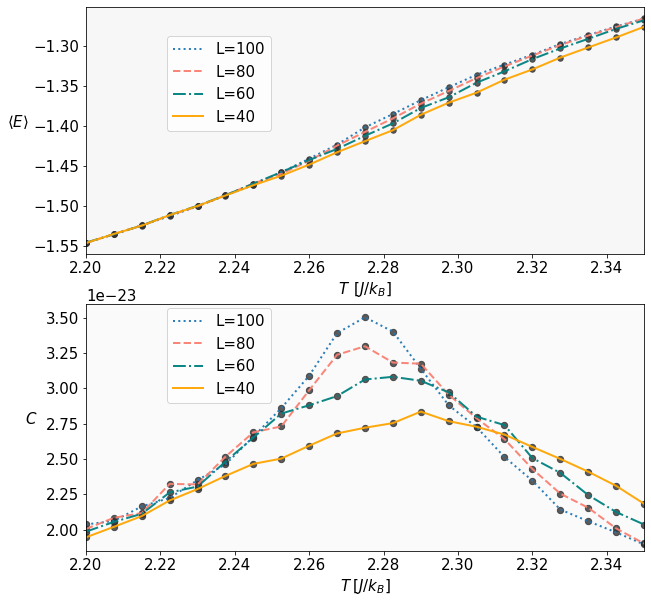

In [203]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (10,10))
gs1 = gridspec.GridSpec(2, 1)
gs1.update(wspace=0.0, hspace=0.2) # set the spacing between axes. 

#axs = plt.subplots(gs1[0],gs1[1], sharey=False)

axs = [plt.subplot(gs1[0]), plt.subplot(gs1[1])]
ax = axs[0]
s1= 30
dotcolor = (0.2,0.2,0.2)
dotalpha=0.8
linewidth = 2

ax.scatter(TME100_4['T'],(TME100_4.E)/(100*100), s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME100_4['T'],(TME100_4.E)/(100*100), color='tab:blue', alpha=0.95, linestyle='dotted', label ='L=100',linewidth =linewidth)

ax.scatter(TME80_4['T'],(TME80_4.E)/(80*80), s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME80_4['T'],(TME80_4.E)/(80*80), color='salmon', alpha=0.95, linestyle='dashed', label ='L=80',linewidth =linewidth)

ax.scatter(TME60_4['T'],(TME60_4.E)/(60*60), s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME60_4['T'],(TME60_4.E)/(60*60), color='teal', alpha=0.95, linestyle='dashdot', label ='L=60',linewidth =linewidth)

ax.scatter(TME40_4['T'],(TME40_4.E)/(40*40), s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME40_4['T'],(TME40_4.E)/(40*40), color='orange', alpha=0.95, linestyle='solid', label ='L=40',linewidth =linewidth)

#plt.ylim(0.1,0.8)
ax.set_xlim(2.2,2.35)

ax.set_xlabel(r'$T \: \: [J/k_B]$')   
ax.set_ylabel(r'$\langle E \rangle \:$', rotation=0, labelpad=15)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

ax.set_facecolor((0.97, 0.97, 0.97))

ax.legend(loc=(0.618**4,0.5))

ax = axs[1]
s1= 40
dotcolor = (0.2,0.2,0.2)
dotalpha=0.8
linewidth = 2

ax.scatter(TME100_4['T'],TME100_4.C, s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME100_4['T'],TME100_4.C, color='tab:blue', alpha=0.95, linestyle='dotted', label ='L=100',linewidth =linewidth)

ax.scatter(TME80_4['T'],TME80_4.C, s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME80_4['T'],TME80_4.C, color='salmon', alpha=0.95, linestyle='dashed', label ='L=80',linewidth =linewidth)

ax.scatter(TME60_4['T'],TME60_4.C, s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME60_4['T'],TME60_4.C, color='teal', alpha=0.95, linestyle='dashdot', label ='L=60',linewidth =linewidth)

ax.scatter(TME40_4['T'],TME40_4.C, s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME40_4['T'],TME40_4.C, color='orange', alpha=0.95, linestyle='solid', label ='L=40',linewidth =linewidth)

ax.set_xlim(2.2,2.35)
ax.set_ylim(1.85e-23,3.6e-23)
ax.set_xlabel(r'$T \: [J/k_B]$')                                
ax.set_ylabel(r'$C \:$', rotation=0, labelpad=15)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)

ax.set_facecolor((0.98, 0.98, 0.98))

ax.legend(loc=(0.618**4,0.6))

plt.tight_layout()
plt.savefig('prob8_eC.pdf')
fig.show()

C:\Users\erlin\miniconda3\envs\inf200\lib\site-packages\ipykernel_launcher.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


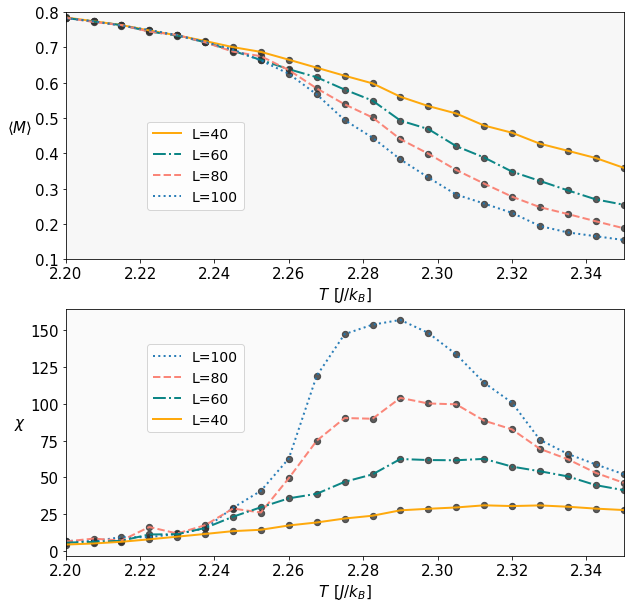

In [204]:
fig = plt.figure(figsize = (10,10))
gs1 = gridspec.GridSpec(2, 1)
gs1.update(wspace=0.0, hspace=0.2) # set the spacing between axes. 

#axs = plt.subplots(gs1[0],gs1[1], sharey=False)

axs = [plt.subplot(gs1[0]), plt.subplot(gs1[1])]
ax = axs[0]
s1= 40
dotcolor = (0.2,0.2,0.2)
dotalpha=0.8
linewidth = 2

ax.scatter(TME40_4['T'],abs(TME40_4.M)/(40*40), s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME40_4['T'],abs(TME40_4.M)/(40*40), color='orange', alpha=0.95, linestyle='solid', label ='L=40',linewidth =linewidth)

ax.scatter(TME60_4['T'],abs(TME60_4.M)/(60*60), s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME60_4['T'],abs(TME60_4.M)/(60*60), color='teal', alpha=0.95, linestyle='dashdot', label ='L=60',linewidth =linewidth)

ax.scatter(TME80_4['T'],abs(TME80_4.M)/(80*80), s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME80_4['T'],abs(TME80_4.M)/(80*80), color='salmon', alpha=0.95, linestyle='dashed', label ='L=80',linewidth =linewidth)

ax.scatter(TME100_4['T'],abs(TME100_4.M)/(100*100), s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME100_4['T'],abs(TME100_4.M)/(100*100), color='tab:blue', alpha=0.95, linestyle='dotted', label ='L=100',linewidth =linewidth)

ax.set_ylim(0.1,0.8)
ax.set_xlim(2.2,2.35)

ax.set_xlabel(r'$T \: \: [J/k_B]$')   
ax.set_ylabel(r'$\langle M \rangle$', rotation=0, labelpad=15)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

ax.set_facecolor((0.97, 0.97, 0.97))

ax.legend(loc=(0.618**4,0.2))

ax = axs[1]
s1= 40
dotcolor = (0.2,0.2,0.2)
dotalpha=0.8
linewidth = 2

ax.scatter(TME100_4['T'],TME100_4.X, s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME100_4['T'],TME100_4.X, color='tab:blue', alpha=0.95, linestyle='dotted', label ='L=100',linewidth =linewidth)

ax.scatter(TME80_4['T'],TME80_4.X, s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME80_4['T'],TME80_4.X, color='salmon', alpha=0.95, linestyle='dashed', label ='L=80',linewidth =linewidth)

ax.scatter(TME60_4['T'],TME60_4.X, s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME60_4['T'],TME60_4.X, color='teal', alpha=0.95, linestyle='dashdot', label ='L=60',linewidth =linewidth)

ax.scatter(TME40_4['T'],TME40_4.X, s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME40_4['T'],TME40_4.X, color='orange', alpha=0.95, linestyle='solid', label ='L=40',linewidth =linewidth)

ax.set_xlim(2.2,2.35)
ax.set_xlabel(r'$T \: \: [J/k_B]$')      
ax.set_ylabel(r'$\chi $', labelpad=10, rotation=0)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

ax.set_facecolor((0.98, 0.98, 0.98))

ax.legend(loc=(0.618**4,0.5))

plt.tight_layout()
plt.savefig('prob8_mX.pdf')
plt.show()

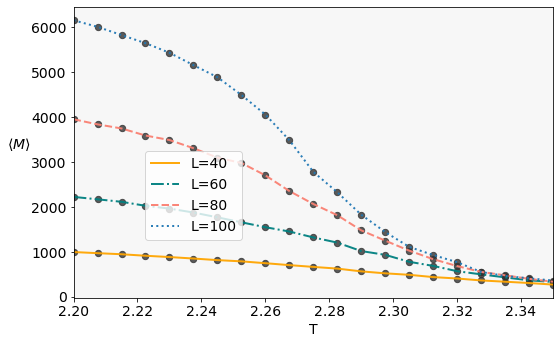

In [137]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
s1= 40
dotcolor = (0.2,0.2,0.2)
dotalpha=0.8
linewidth = 2

ax.scatter(TME40_4['T'],TME40_4.M2/(40*40), s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME40_4['T'],TME40_4.M2/(40*40), color='orange', alpha=0.95, linestyle='solid', label ='L=40',linewidth =linewidth)

ax.scatter(TME60_4['T'],abs(TME60_4.M2)/(60*60), s= s1, color=dotcolor, alpha=dotalpha)
ax.plot(TME60_4['T'],abs(TME60_4.M2)/(60*60), color='teal', alpha=0.95, linestyle='dashdot', label ='L=60',linewidth =linewidth)

ax.scatter(TME80_4['T'],TME80_4.M2/(80*80), s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME80_4['T'],TME80_4.M2/(80*80), color='salmon', alpha=0.95, linestyle='dashed', label ='L=80',linewidth =linewidth)

ax.scatter(TME100_4['T'],TME100_4.M2/(100*100), s= s1, color=dotcolor, alpha=dotalpha, marker='o')
ax.plot(TME100_4['T'],TME100_4.M2/(100*100), color='tab:blue', alpha=0.95, linestyle='dotted', label ='L=100',linewidth =linewidth)

plt.xlim(2.2,2.35)

ax.set_xlabel('T')
ax.set_ylabel(r'$\langle M \rangle$', rotation=0, labelpad=12)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

ax.set_facecolor((0.97, 0.97, 0.97))

plt.legend(loc=(0.15,0.2))
plt.tight_layout()
plt.show()

# 